In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import numpy as np

In [4]:
retail_df = pd.read_excel("Online_Retail.xlsx")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_df.info()
retail_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


(541909, 8)

In [6]:
# Drop StockCode and CustomerID
retail_df = retail_df.drop(columns=["StockCode", "CustomerID"])

retail_df['Description'] = retail_df['Description'].str.strip()
retail_df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [7]:
retail_df.isnull().sum()/len(retail_df)*100
retail_df[retail_df.isnull().any(axis=1)]
retail_df = retail_df.dropna()
retail_df.shape

(540454, 6)

In [10]:
# Remove invoices that starts with "C"
retail_df["InvoiceNo"] = retail_df["InvoiceNo"].astype(str)
retail_df = retail_df[~retail_df["InvoiceNo"].str.contains("C")]

In [11]:
# Check for duplicate row
retail_duplicates_df = retail_df[retail_df.duplicated()]
retail_duplicates_df

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
517,536409,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,United Kingdom
527,536409,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,United Kingdom
537,536409,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,United Kingdom
539,536409,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,United Kingdom
555,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,United Kingdom
...,...,...,...,...,...,...
541675,581538,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,United Kingdom
541689,581538,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,United Kingdom
541692,581538,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,United Kingdom
541699,581538,WICKER STAR,1,2011-12-09 11:34:00,2.10,United Kingdom


In [12]:
#Drop the duplicate rows
retail_df = retail_df.drop(retail_duplicates_df.index)
retail_df.shape

(525856, 6)

In [13]:
# Remove rows where the customer paid for Postage

retail_df[retail_df.Description != "POSTAGE"]
retail_df = retail_df[retail_df.Description != "POSTAGE"]

In [14]:
# Select only Germany, Fance, Spaine, Netherlands, Belgium

retail_df.Country.value_counts()

country_list = ['Germany', 'France', 'Spain', 'Netherlands', 'Belgium']

retail_df = retail_df.loc[retail_df["Country"].isin(country_list)].reset_index().drop('index',axis=1)

In [15]:
retail_df.shape

(23425, 6)

### Data Exploration EDA

In [16]:
# Add date columns and TotalPrice

retail_df["TotalPrice"] = retail_df["Quantity"] * retail_df["UnitPrice"]
retail_df["Year"] = retail_df["InvoiceDate"].dt.year
retail_df["Month"] = retail_df["InvoiceDate"].dt.month
retail_df["Hour"] = retail_df["InvoiceDate"].dt.hour
retail_df["DayOfWeek"] = retail_df["InvoiceDate"].dt.dayofweek
retail_df["DayName"] = retail_df["InvoiceDate"].dt.day_name()

In [17]:
# Order the day name
day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

retail_df["DayName"] = pd.Categorical(retail_df["DayName"], categories=day_names, ordered=True)

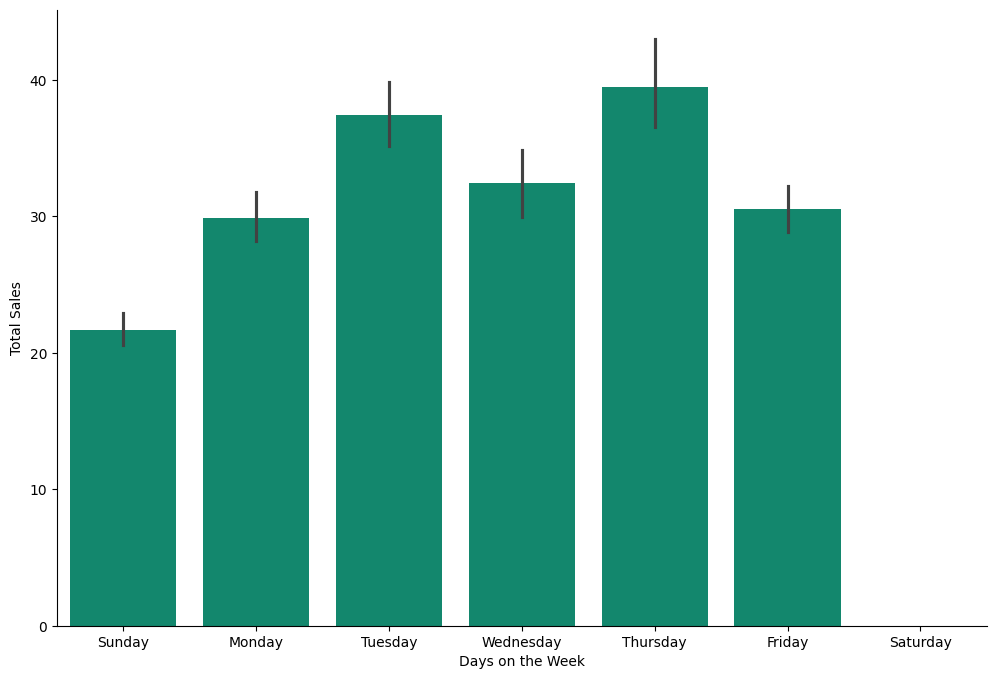

In [21]:
# Tuesday and Thursday seesm to have higher sales
plt.figure(figsize=(12,8))

sns.barplot(x="DayName", y='TotalPrice', data=retail_df, color=('#009A78'));

#plt.title("Sales on different Days of Week")

plt.xlabel("Days on the Week")
plt.ylabel("Total Sales")

sns.despine()

In [23]:
retail_df['TotalPrice']

,TotalPrice
0,90.00
1,90.00
2,45.00
3,10.20
4,15.60
...,...
23420,10.20
23421,12.60
23422,16.60
23423,16.60


In [22]:
pivot_retail_df = retail_df.pivot_table(index = 'Month',
                                        columns='DayName',
                                        values = 'TotalPrice',
                                        aggfunc= 'mean')

pivot_retail_df

<ipython-input-22-b0d52e121e7c>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_retail_df = retail_df.pivot_table(index = 'Month',


DayName,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
Month,,,,,,
1,26.025000,24.766365,46.299746,40.338789,22.085097,38.347284
2,23.150000,74.194207,45.645154,18.233016,22.741106,25.395356
3,19.602969,18.164542,57.338449,27.440779,37.088345,27.024802
4,18.649273,20.037667,44.058643,30.422222,22.354359,23.642424
5,18.302639,21.383593,22.520855,34.793415,71.900937,24.977168
6,40.425342,18.821746,73.415069,38.850478,16.218297,31.145503
7,17.645641,32.434065,16.347103,19.859714,28.868000,18.439963
8,12.416514,24.139852,45.434715,29.926565,52.648891,39.625314
9,17.497778,60.180836,54.367273,18.050346,26.593925,23.590600


Text(120.72222222222221, 0.5, 'Months represented')

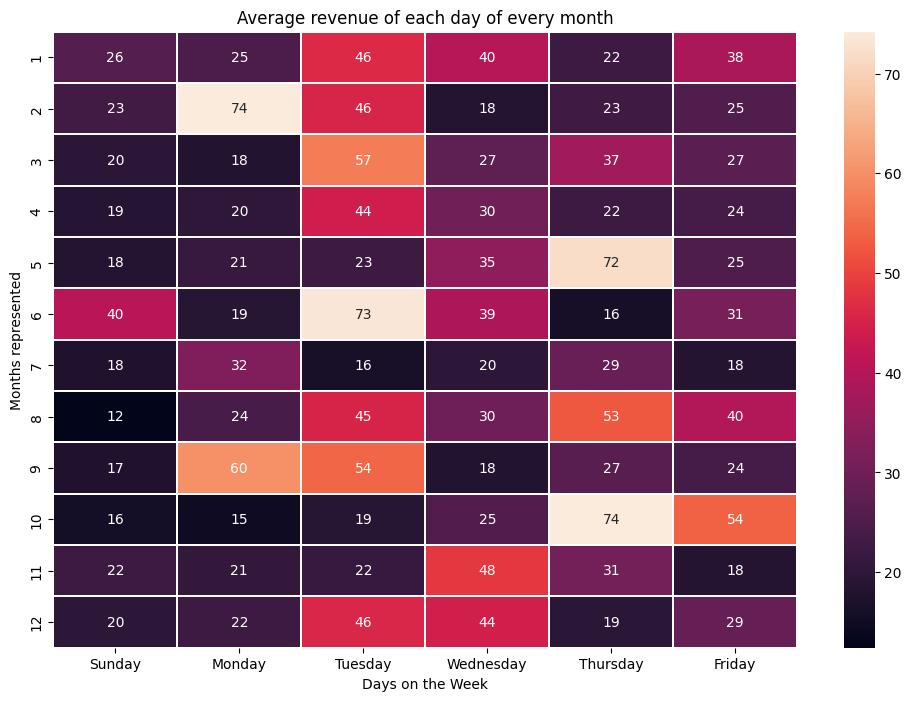

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_retail_df, linewidths = .1, annot =True)

plt.title("Average revenue of each day of every month")
plt.xlabel("Days on the Week")
plt.ylabel("Months represented")

### Identify top 10 products

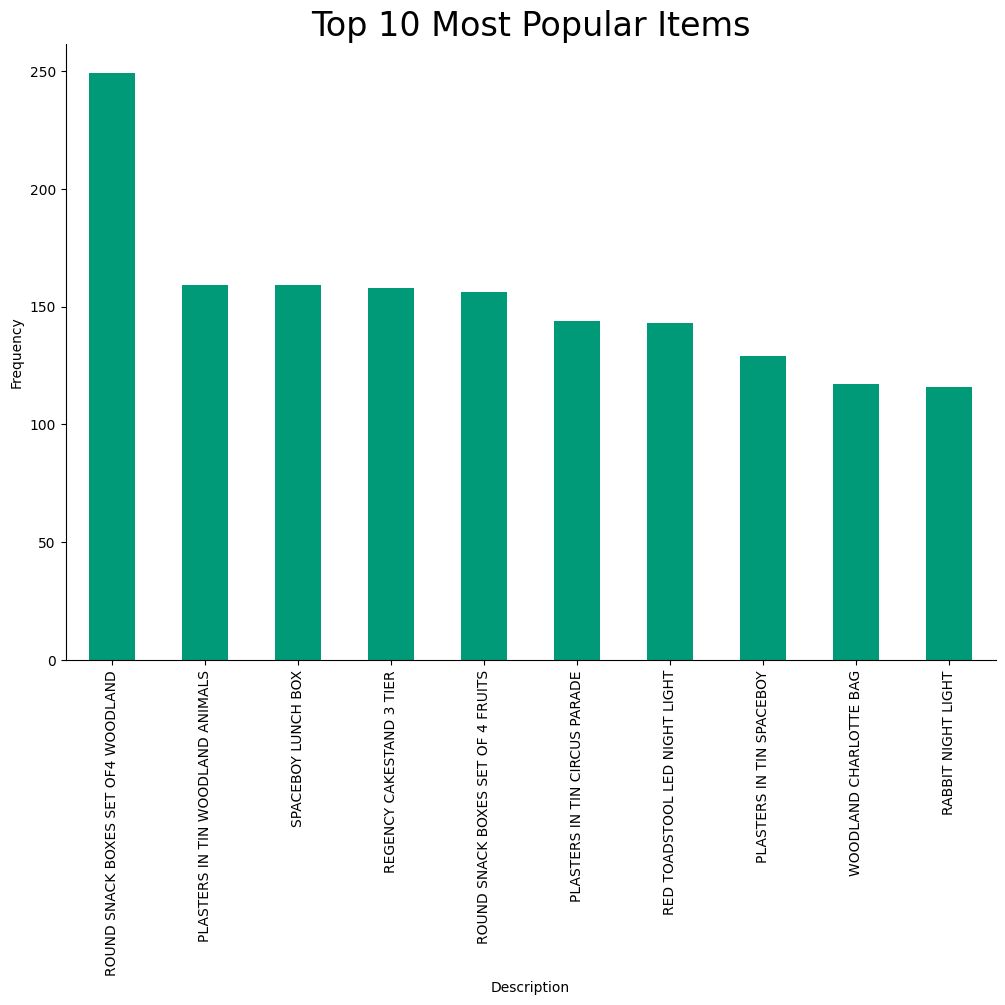

In [25]:
fig, ax = plt.subplots(figsize = (12,8))

retail_df["Description"].value_counts().sort_values(ascending=False).head(10).plot.bar(color=("#009A78"))


plt.title("Top 10 Most Popular Items", fontsize=24)
plt.xlabel("Description")
plt.ylabel("Frequency")

ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);



Text(0, 0.5, 'Frequency')

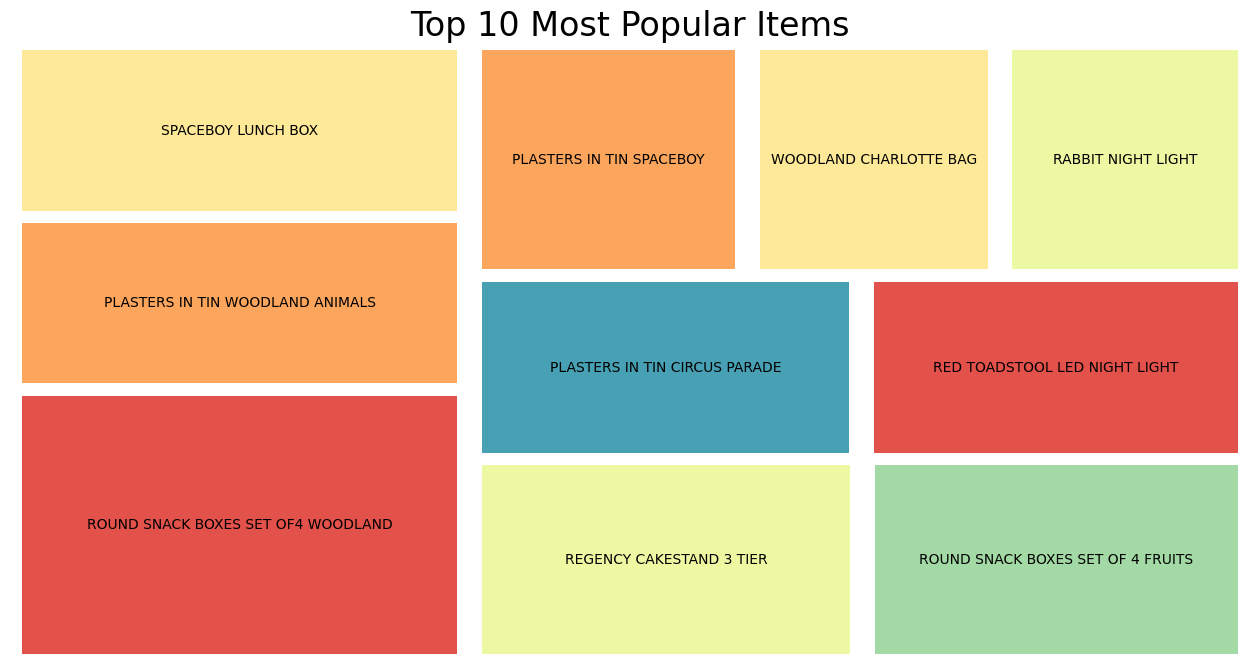

In [134]:
plt.figure(figsize=(16,8))

x = retail_df["Description"].value_counts().sort_values(ascending=False).head(10)

color = ['lime', 'pink', 'lightgreen', 'yellow', 'orange', 'red', 'lightblue', 'cyan', 'azure']
data = [300, 400, 120, 590, 600, 760]
sq.plot(sizes=x, label= x.index,
        color = sns.color_palette("Spectral",
        len(data)), pad=1,
        text_kwargs={'fontsize': 10}).axis('off')

plt.title("Top 10 Most Popular Items", fontsize=24)
plt.xlabel("Description")
plt.ylabel("Frequency")

In [27]:
# Select only InvoiceNo and Description
retail_df = retail_df.drop(columns=['Quantity', 'InvoiceDate',
                        'UnitPrice', 'Country',
                        'TotalPrice','Year',
                        'Month','Hour',
                        'DayOfWeek','DayName'])
retail_df

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE
...,...,...
23420,581587,PACK OF 20 SPACEBOY NAPKINS
23421,581587,CHILDREN'S APRON DOLLY GIRL
23422,581587,CHILDRENS CUTLERY DOLLY GIRL
23423,581587,CHILDRENS CUTLERY CIRCUS PARADE


In [28]:
# Group the product per invoice no
items_per_transaction = retail_df.groupby('InvoiceNo').agg(",".join).reset_index()
items_per_transaction.head()

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."


In [29]:
# Save the file
items_per_transaction.to_csv("items_per_transaction.csv", index=True)

#### Import Libraries for Market Basket Analysis
#### Transaction Encoding

In [30]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [31]:
df = pd.read_csv("items_per_transaction.csv")
df

,Unnamed: 0,InvoiceNo,Description
0,0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,1,536403,HAND WARMER BIRD DESIGN
2,2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."
...,...,...,...
1111,1111,581494,"RABBIT NIGHT LIGHT,STRAWBERRY LUNCH BOX WITH C..."
1112,1112,581570,"CHRISTMAS CRAFT TREE TOP ANGEL,PINK OWL SOFT T..."
1113,1113,581574,"ROUND SNACK BOXES SET OF4 WOODLAND,ROUND SNACK..."
1114,1114,581578,"SET/10 BLUE POLKADOT PARTY CANDLES,SET/10 PINK..."


In [32]:
# Only need the items that are sold together. Remove the InvoiceNo
item_list = [item.split(",") for item in df.Description]
item_list

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE'],
 ['HAND WARMER BIRD DESIGN'],
 ['SET OF 6 T-LIGHTS SANTA',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  'JUMBO BAG WOODLAND ANIMALS',
  'JUMBO BAG OWLS',
  'HOT WATER BOTTLE BABUSHKA',
  'HOMEMADE JAM SCEN

In [62]:
# Create transction encoder
te = TransactionEncoder()
te_array = te.fit(item_list).transform(item_list)


In [63]:
item_df = pd.DataFrame(te_array, columns=te.columns_)
item_df

# Drop the empty column
item_df = item_df.drop(columns=[""])
item_df

,,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1114,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
spaceboy_lunchbox_df = item_df[item_df["SPACEBOY LUNCH BOX"] == True]

spaceboy_lunchbox_df["SPACEBOY LUNCH BOX"]

,SPACEBOY LUNCH BOX
0,True
14,True
48,True
57,True
71,True
...,...
1052,True
1083,True
1106,True
1107,True


In [77]:
spaceboy_dolly = item_df[(item_df["SPACEBOY LUNCH BOX"] == True) &
                        (item_df["DOLLY GIRL LUNCH BOX"] == True)]
spaceboy_dolly[["SPACEBOY LUNCH BOX", "DOLLY GIRL LUNCH BOX"]]

,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
48,True,True
74,True,True
87,True,True
96,True,True
105,True,True
...,...,...
993,True,True
997,True,True
1017,True,True
1029,True,True


In [78]:
pd.set_option('display.max_colwidth', None)

#### APRIOR ALGORITHM TO FIND MOST FREQUENT ITEMSETS BASED ON SUPPORT
- threshold 10%

In [131]:

# Min Support of 10%
# freq_items = apriori(item_df, min_support=0.1, use_colnames=True)
# freq_items.sort_values('support', ascending=False)

# Min Support of 5%
# frequent_items = apriori(item_df, min_support=0.05, use_colnames=True)
# frequent_items.sort_values('support', ascending=False)

# # Min Support of 2%
frequent_items = apriori(item_df, min_support=0.02, use_colnames=True)
frequent_items.sort_values('support', ascending=False)

,support,itemsets
197,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
247,0.142473,(SPACEBOY LUNCH BOX)
154,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
183,0.141577,(REGENCY CAKESTAND 3 TIER)
196,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
621,0.020609,"(LUNCH BOX WITH CUTLERY RETROSPOT, STRAWBERRY LUNCH BOX WITH CUTLERY, PLASTERS IN TIN CIRCUS PARADE)"
626,0.020609,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)"
627,0.020609,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES, PACK OF 6 SKULL PAPER CUPS)"
22,0.020609,(BISCUIT TIN 50'S CHRISTMAS)


#### ASSOCIATION RULES

##### Support Metric

In [103]:
# USING SUPPORT
assoc_rules = association_rules(frequent_items, metric="support", min_threshold=.10)
assoc_rules.sort_values('confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,1.0,0.076338,3.366487,0.825312,0.421053,0.702954,0.625579
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,1.0,0.076338,1.660415,0.913841,0.421053,0.397741,0.625579


##### Confidence Metric

In [105]:
# USING CONFIDENCE
assoc_rules = association_rules(frequent_items, metric="confidence", min_threshold=1)
assoc_rules.sort_values('confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.0,26.571429,1.0,0.026732,inf,0.989862,0.738095,1.0,0.869048
1,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.0,28.615385,1.0,0.024213,inf,0.989890,0.717949,1.0,0.858974
2,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.0,12.827586,1.0,0.019829,inf,0.942308,0.275862,1.0,0.637931
3,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.0,26.571429,1.0,0.023283,inf,0.986226,0.642857,1.0,0.821429
4,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.0,28.615385,1.0,0.023348,inf,0.988981,0.692308,1.0,0.846154


In [107]:
# USING CONFIDENCE
assoc_rules = association_rules(frequent_items, metric="confidence", min_threshold=0.9)
assoc_rules.sort_values('confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,1.0,0.026732,inf,0.989862,0.738095,1.000000,0.869048
4,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,1.0,0.024213,inf,0.989890,0.717949,1.000000,0.858974
19,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,1.0,0.023283,inf,0.986226,0.642857,1.000000,0.821429
14,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.000000,12.827586,1.0,0.019829,inf,0.942308,0.275862,1.000000,0.637931
20,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,1.0,0.023348,inf,0.988981,0.692308,1.000000,0.846154
18,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETROSPOT PAPER NAPKINS)",(SET/6 RED SPOTTY PAPER PLATES),0.051971,0.077957,0.050179,0.965517,12.385256,1.0,0.046128,26.739247,0.969653,0.629213,0.962602,0.804598
6,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(SPACEBOY CHILDRENS BOWL),0.025090,0.050179,0.024194,0.964286,19.216837,1.0,0.022935,26.594982,0.972358,0.473684,0.962399,0.723214
21,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(SPACEBOY CHILDRENS BOWL),0.025090,0.050179,0.024194,0.964286,19.216837,1.0,0.022935,26.594982,0.972358,0.473684,0.962399,0.723214
22,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",0.025090,0.027778,0.024194,0.964286,34.714286,1.0,0.023497,27.222222,0.996187,0.843750,0.963265,0.917627
13,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS)",(SET/6 RED SPOTTY PAPER CUPS),0.023297,0.078853,0.022401,0.961538,12.194056,1.0,0.020564,23.949821,0.939890,0.280899,0.958246,0.622815


##### Lift Metrics

In [121]:
# USING LIFT
assoc_rules = association_rules(frequent_items, metric="lift", min_threshold=29)
assoc_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",0.025090,0.027778,0.024194,0.964286,34.714286,1.0,0.023497,27.222222,0.996187,0.843750,0.963265,0.917627
2,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)","(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.025090,0.024194,0.870968,34.714286,1.0,0.023497,7.555556,0.998942,0.843750,0.867647,0.917627
1,(POPPY'S PLAYHOUSE LIVINGROOM),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE BEDROOM)",0.025090,0.027778,0.020609,0.821429,29.571429,1.0,0.019912,5.444444,0.991049,0.638889,0.816327,0.781682
0,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE BEDROOM)",(POPPY'S PLAYHOUSE LIVINGROOM),0.027778,0.025090,0.020609,0.741935,29.571429,1.0,0.019912,3.777778,0.993789,0.638889,0.735294,0.781682


##### Support Metric

In [123]:
# USING LIFT
assoc_rules = association_rules(frequent_items, metric="support", min_threshold=.02)
assoc_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1106,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,1.0,0.023348,inf,0.988981,0.692308,1.000000,0.846154
1105,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,1.0,0.023283,inf,0.986226,0.642857,1.000000,0.821429
896,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.000000,12.827586,1.0,0.019829,inf,0.942308,0.275862,1.000000,0.637931
686,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,1.0,0.024213,inf,0.989890,0.717949,1.000000,0.858974
678,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,1.0,0.026732,inf,0.989862,0.738095,1.000000,0.869048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,(ROUND SNACK BOXES SET OF4 WOODLAND),"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",0.223118,0.032258,0.020609,0.092369,2.863454,1.0,0.013412,1.066229,0.837671,0.087786,0.062115,0.365629
132,(ROUND SNACK BOXES SET OF4 WOODLAND),(DOLLY GIRL CHILDRENS CUP),0.223118,0.034946,0.020609,0.092369,2.643188,1.0,0.012812,1.063267,0.800211,0.086792,0.059503,0.341057
588,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND MINI BACKPACK),0.223118,0.041219,0.020609,0.092369,2.240964,1.0,0.011413,1.056356,0.712803,0.084559,0.053350,0.296185
827,(ROUND SNACK BOXES SET OF4 WOODLAND),"(PLASTERS IN TIN WOODLAND ANIMALS, LUNCH BAG WOODLAND)",0.223118,0.032258,0.020609,0.092369,2.863454,1.0,0.013412,1.066229,0.837671,0.087786,0.062115,0.365629


In [124]:
assoc_rules[(assoc_rules['confidence'] >= 0.9) & (assoc_rules['lift'] >= 25)].sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
678,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,1.0,0.026732,inf,0.989862,0.738095,1.000000,0.869048
686,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,1.0,0.024213,inf,0.989890,0.717949,1.000000,0.858974
1105,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,1.0,0.023283,inf,0.986226,0.642857,1.000000,0.821429
1106,"(SPACEBOY CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,1.0,0.023348,inf,0.988981,0.692308,1.000000,0.846154
1113,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",0.025090,0.027778,0.024194,0.964286,34.714286,1.0,0.023497,27.222222,0.996187,0.843750,0.963265,0.917627
871,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.022401,0.035842,0.021505,0.960000,26.784000,1.0,0.020702,24.103943,0.984723,0.585366,0.958513,0.780000
1040,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE KITCHEN),0.021505,0.037634,0.020609,0.958333,25.464286,1.0,0.019800,23.096774,0.981844,0.534884,0.956704,0.752976
1039,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE BEDROOM),0.022401,0.034946,0.020609,0.920000,26.326154,1.0,0.019826,12.063172,0.984059,0.560976,0.917103,0.754872
866,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,1.0,0.024094,9.962963,0.987755,0.651163,0.899628,0.801613


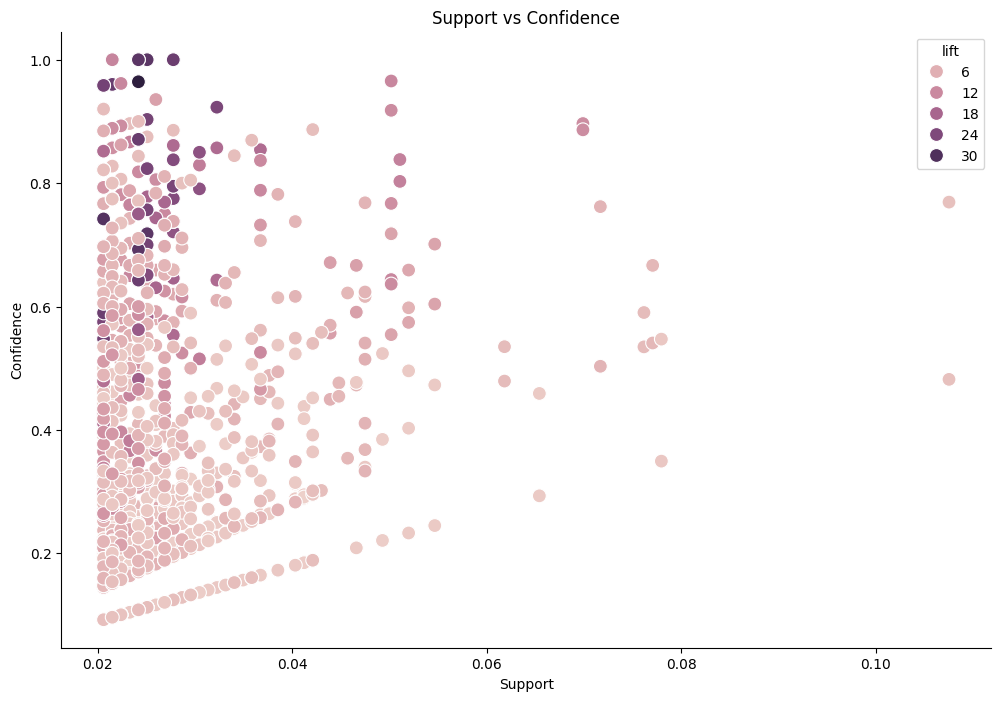

In [128]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=assoc_rules['support'],
                y=assoc_rules['confidence'],
                hue=assoc_rules['lift'],
                s=100)

plt.title('Support vs Confidence')

plt.xlabel('Support')
plt.ylabel('Confidence')

sns.despine()

#### RECCOMENDATIONS FOR 'ROUND SNACK BOXES SET OF4 WOODLAND'




In [135]:
# # Min Support of 1%
frequent_items = apriori(item_df, min_support=0.01, use_colnames=True)
frequent_items.sort_values('support', ascending=False)

,support,itemsets
394,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
311,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
483,0.142473,(SPACEBOY LUNCH BOX)
365,0.141577,(REGENCY CAKESTAND 3 TIER)
392,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
2804,0.010753,"(PLASTERS IN TIN SPACEBOY, ROUND SNACK BOXES SET OF4 WOODLAND, LUNCH BAG PINK POLKADOT)"
2796,0.010753,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROSPOT)"
2795,0.010753,"(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY LUNCH BOX, LUNCH BAG DOLLY GIRL DESIGN)"
2792,0.010753,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG DOLLY GIRL DESIGN)"


In [138]:
assoc_rules = association_rules(frequent_items, metric="support", min_threshold=.01)
assoc_rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2970,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,1.0,0.076338,1.660415,0.913841,0.421053,0.397741,0.625579
2971,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,1.0,0.076338,3.366487,0.825312,0.421053,0.702954,0.625579
3051,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,1.0,0.046169,1.715614,0.690628,0.271028,0.417118,0.448284
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,1.0,0.046169,1.318051,0.762320,0.271028,0.241304,0.448284
2451,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.115591,0.142473,0.077061,0.666667,4.679245,1.0,0.060592,2.572581,0.889058,0.425743,0.611285,0.603774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,(3 PIECE SPACEBOY COOKIE CUTTER SET),(ROUND SNACK BOXES SET OF 4 FRUITS),0.037634,0.139785,0.010753,0.285714,2.043956,1.0,0.005492,1.204301,0.530726,0.064516,0.169643,0.181319
39,(ROUND SNACK BOXES SET OF4 WOODLAND),(36 PENCILS TUBE WOODLAND),0.223118,0.023297,0.010753,0.048193,2.068582,1.0,0.005555,1.026156,0.664937,0.045627,0.025489,0.254866
38,(36 PENCILS TUBE WOODLAND),(ROUND SNACK BOXES SET OF4 WOODLAND),0.023297,0.223118,0.010753,0.461538,2.068582,1.0,0.005555,1.442780,0.528899,0.045627,0.306894,0.254866
37,(36 PENCILS TUBE RED RETROSPOT),(ROUND SNACK BOXES SET OF4 WOODLAND),0.033154,0.223118,0.010753,0.324324,1.453598,1.0,0.003355,1.149785,0.322753,0.043796,0.130272,0.186259


In [142]:
#Filter only for ROUND SNACK BOXES SET OF4 WOODLAND' Top 5
round_snack_boxes_antecedent = assoc_rules[assoc_rules['antecedents'] == {'ROUND SNACK BOXES SET OF4 WOODLAND'}]
round_snack_boxes_antecedent = round_snack_boxes_antecedent.sort_values('support', ascending=False).head(5)

round_snack_boxes_antecedent


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2970,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,1.0,0.076338,1.660415,0.913841,0.421053,0.397741,0.625579
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,1.0,0.046169,1.318051,0.762320,0.271028,0.241304,0.448284
2573,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.223118,0.142473,0.065412,0.293173,2.057740,1.0,0.033624,1.213206,0.661658,0.217910,0.175737,0.376146
2479,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN SPACEBOY),0.223118,0.115591,0.054659,0.244980,2.119361,1.0,0.028869,1.171371,0.679846,0.192429,0.146299,0.358924
3078,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND CHARLOTTE BAG),0.223118,0.104839,0.051971,0.232932,2.221810,1.0,0.028580,1.166990,0.707851,0.188312,0.143095,0.364329


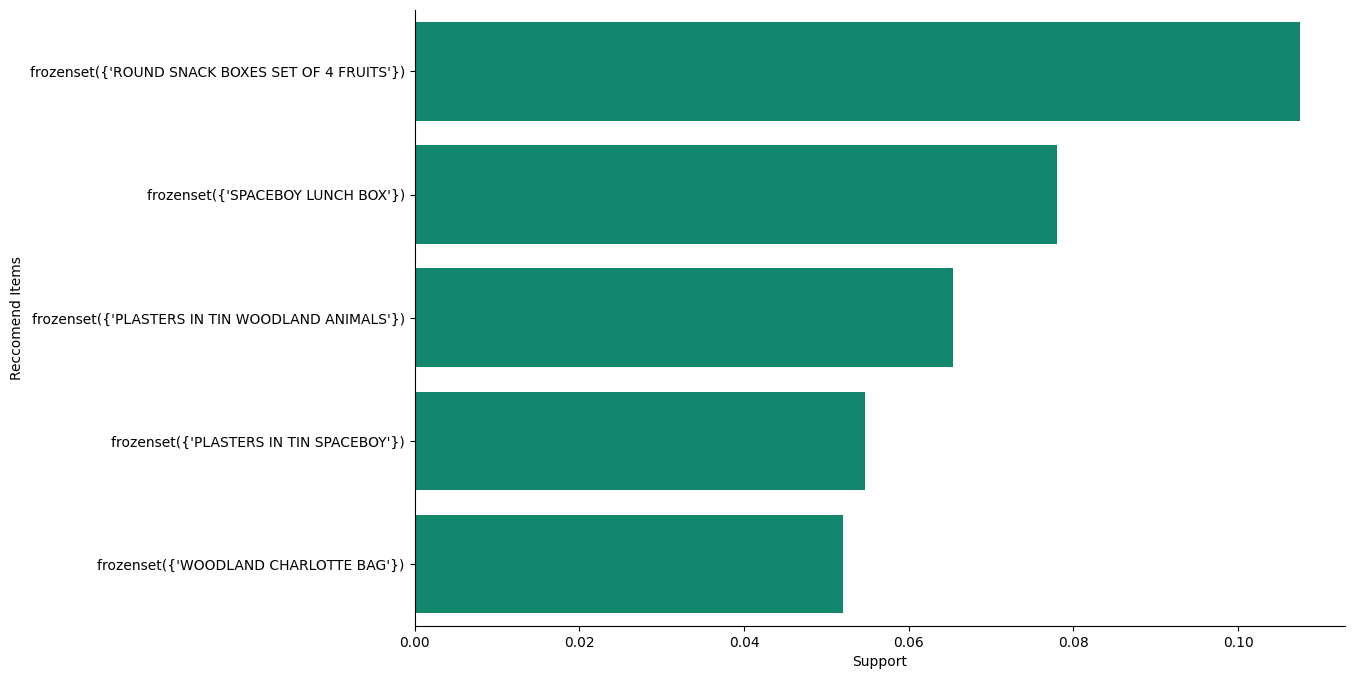

In [145]:
plt.figure(figsize=(12,8))

x=sns.barplot(x='support', y='consequents', data=round_snack_boxes_antecedent, color ='#009A78')

#plt.title("Top 5 Reccomendation's for 'ROUND SNACK BOXES SET OF4 WOODLAND'")
plt.xlabel('Support')
plt.ylabel('Reccomend Items')

sns.despine()